## Cluster Analysis

In [150]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from math import sin, cos, pi

In [151]:
# edited dataframe 
df=pd.read_csv('../dataset/chicago_2018.csv')
df["start_time"] = pd.to_datetime(df['start_time'])
df["end_time"] = pd.to_datetime(df['end_time'] ) 
df["duration_per_trip"] = pd.to_timedelta(df.duration_per_trip)
df.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result,duration_per_trip,trip_time_in_hours
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,Keep,0 days 00:08:19,0.138611
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,Keep,0 days 00:20:25,0.340278
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,Keep,0 days 00:16:00,0.266667
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,Keep,0 days 00:07:14,0.120556
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,Keep,0 days 00:11:49,0.196944


### Data Preparation

In [152]:
# extra dataframe with features
df_extra=df[["start_time","trip_time_in_hours"]].copy()
df_extra.loc[:,"hour"]= df_extra.start_time.apply(lambda x: (x.hour)+(x.minute/60))
df_extra.loc[:,"day_of_week"] = df_extra.start_time.apply(lambda x: x.day_of_week)

# function to create sin and cos feature of variables
def sin_cos_feature(name, df, feature, values):
    df[name+"_sin"]= feature.apply(lambda x: sin(2*pi*(x/values)))
    df[name+"_cos"]= feature.apply(lambda x: cos(2*pi*(x/values)))

# new circular feature for hour and day_of_week
sin_cos_feature("hour", df_extra, df_extra.hour, 24)
sin_cos_feature("day_of_week", df_extra, df_extra.day_of_week, 7)

# drop unnecessary features for the cluster analysis
X = df_extra.drop(["start_time", "hour", "day_of_week"], axis=1)
X

,trip_time_in_hours,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,0.138611,0.017452,0.999848,-0.781831,0.623490
1,0.340278,0.026177,0.999657,-0.781831,0.623490
2,0.266667,0.030539,0.999534,-0.781831,0.623490
3,0.120556,0.030539,0.999534,-0.781831,0.623490
4,0.196944,0.043619,0.999048,-0.781831,0.623490
...,...,...,...,...,...
3567016,0.313889,-0.061049,0.998135,-0.974928,-0.222521
3567017,0.072778,-0.056693,0.998392,-0.974928,-0.222521
3567018,0.122222,-0.043619,0.999048,-0.974928,-0.222521
3567019,0.246389,-0.034899,0.999391,-0.974928,-0.222521


In [153]:
# standardize dataframe
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df

,trip_time_in_hours,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,-0.487507,0.423002,2.447993,-1.233752,0.904379
1,0.259169,0.435064,2.447640,-1.233752,0.904379
2,-0.013378,0.441094,2.447410,-1.233752,0.904379
3,-0.554358,0.441094,2.447410,-1.233752,0.904379
4,-0.271526,0.459179,2.446510,-1.233752,0.904379
...,...,...,...,...,...
3567016,0.161464,0.314474,2.444817,-1.511439,-0.280086
3567017,-0.731257,0.320496,2.445293,-1.511439,-0.280086
3567018,-0.548187,0.338570,2.446510,-1.511439,-0.280086
3567019,-0.088457,0.350625,2.447146,-1.511439,-0.280086


### K-Means Analysis

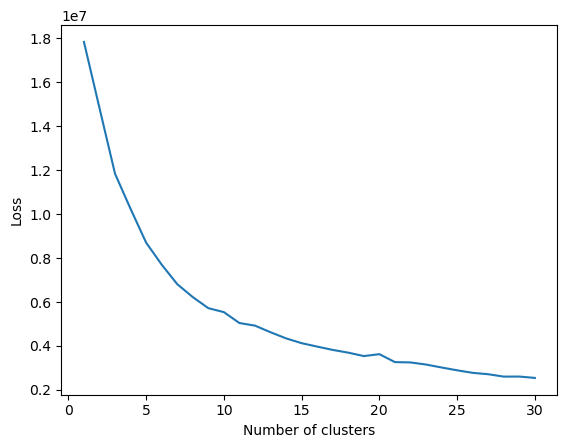

In [154]:
k_max = 30
clusters = []
losses = []

# search for clusters vs loss
# we use MiniBatchKMeans because of the huge dataset
for k in range(k_max):
    model = MiniBatchKMeans(n_clusters=k+1,random_state=42,init="k-means++")
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

# visualize
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

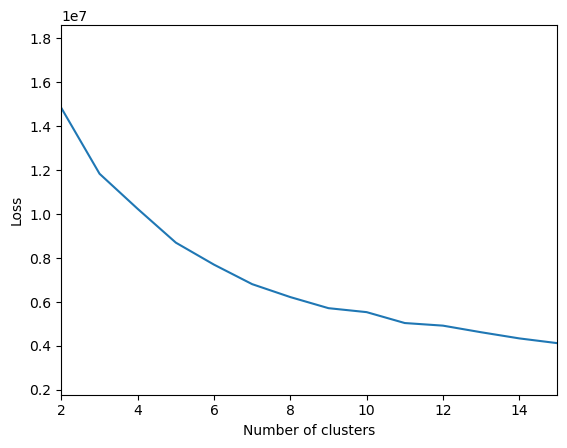

In [163]:
# zoom in
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([2,15])
plt.show()

In [164]:
# apply K-Means with specific cluster number
means = MiniBatchKMeans(n_clusters=8, random_state=42, init="k-means++")
means.fit(X_scaled)
cluster = ["1", "2", "3", "4", "5", "6", "7", "8"]
X_scaled_df["cluster"] = means.predict(X_scaled)
X_scaled_df["cluster"] = X_scaled_df["cluster"].apply(lambda x: cluster[x])

# add features for analysis
X_scaled_df["duration_per_trip"]= df_extra.trip_time_in_hours
X_scaled_df["hour"]=df_extra.hour
X_scaled_df["day_of_week"]=df_extra.day_of_week
X_scaled_df["start_station_id"]=df.start_station_id
X_scaled_df["end_station_id"]=df.end_station_id
X_scaled_df

,trip_time_in_hours,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,cluster,duration_per_trip,hour,day_of_week,start_station_id,end_station_id
0,-0.487507,0.423002,2.447993,-1.233752,0.904379,2,0.138611,0.066667,6,22,171
1,0.259169,0.435064,2.447640,-1.233752,0.904379,2,0.340278,0.100000,6,157,190
2,-0.013378,0.441094,2.447410,-1.233752,0.904379,2,0.266667,0.116667,6,106,106
3,-0.554358,0.441094,2.447410,-1.233752,0.904379,2,0.120556,0.116667,6,241,171
4,-0.271526,0.459179,2.446510,-1.233752,0.904379,2,0.196944,0.166667,6,228,219
...,...,...,...,...,...,...,...,...,...,...,...
3567016,0.161464,0.314474,2.444817,-1.511439,-0.280086,2,0.313889,23.766667,5,158,260
3567017,-0.731257,0.320496,2.445293,-1.511439,-0.280086,2,0.072778,23.783333,5,299,229
3567018,-0.548187,0.338570,2.446510,-1.511439,-0.280086,2,0.122222,23.833333,5,327,226
3567019,-0.088457,0.350625,2.447146,-1.511439,-0.280086,2,0.246389,23.866667,5,265,426


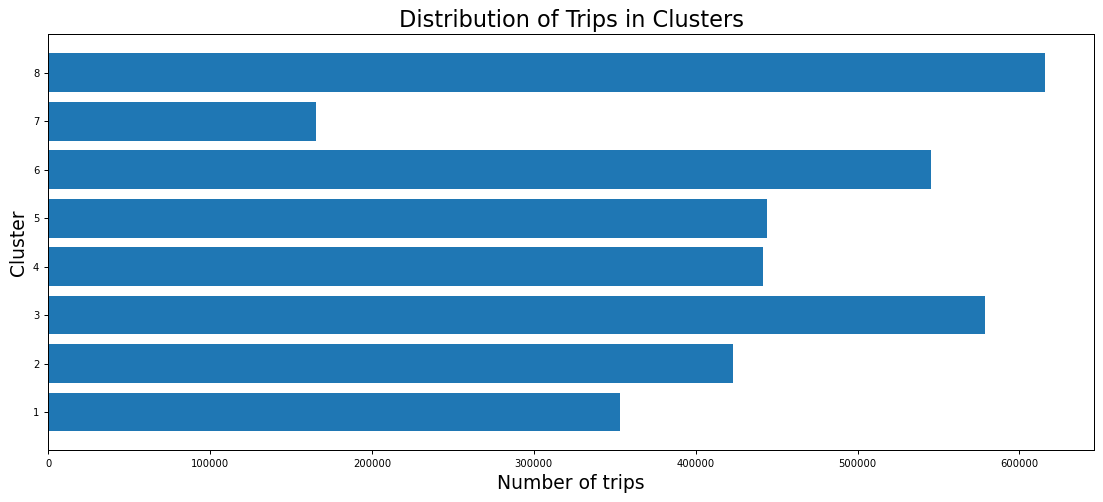

In [165]:
# show distribution of cluster
count = [len(X_scaled_df[X_scaled_df.cluster==cluster[i]]) for i in range(len(cluster))]

fig,ax = plt.subplots(figsize=(15,6), dpi=90) 
axis_font = {'size':'15'}
label_font = {'labelsize':'8'}
dic={'fontsize': '18'}
ax.set_title("Distribution of Trips in Clusters", dic)
ax.set_ylabel("Cluster", **axis_font)
ax.set_xlabel("Number of trips", **axis_font)
ax.tick_params(axis='both', **label_font)

plt.barh(cluster,count)
plt.show()

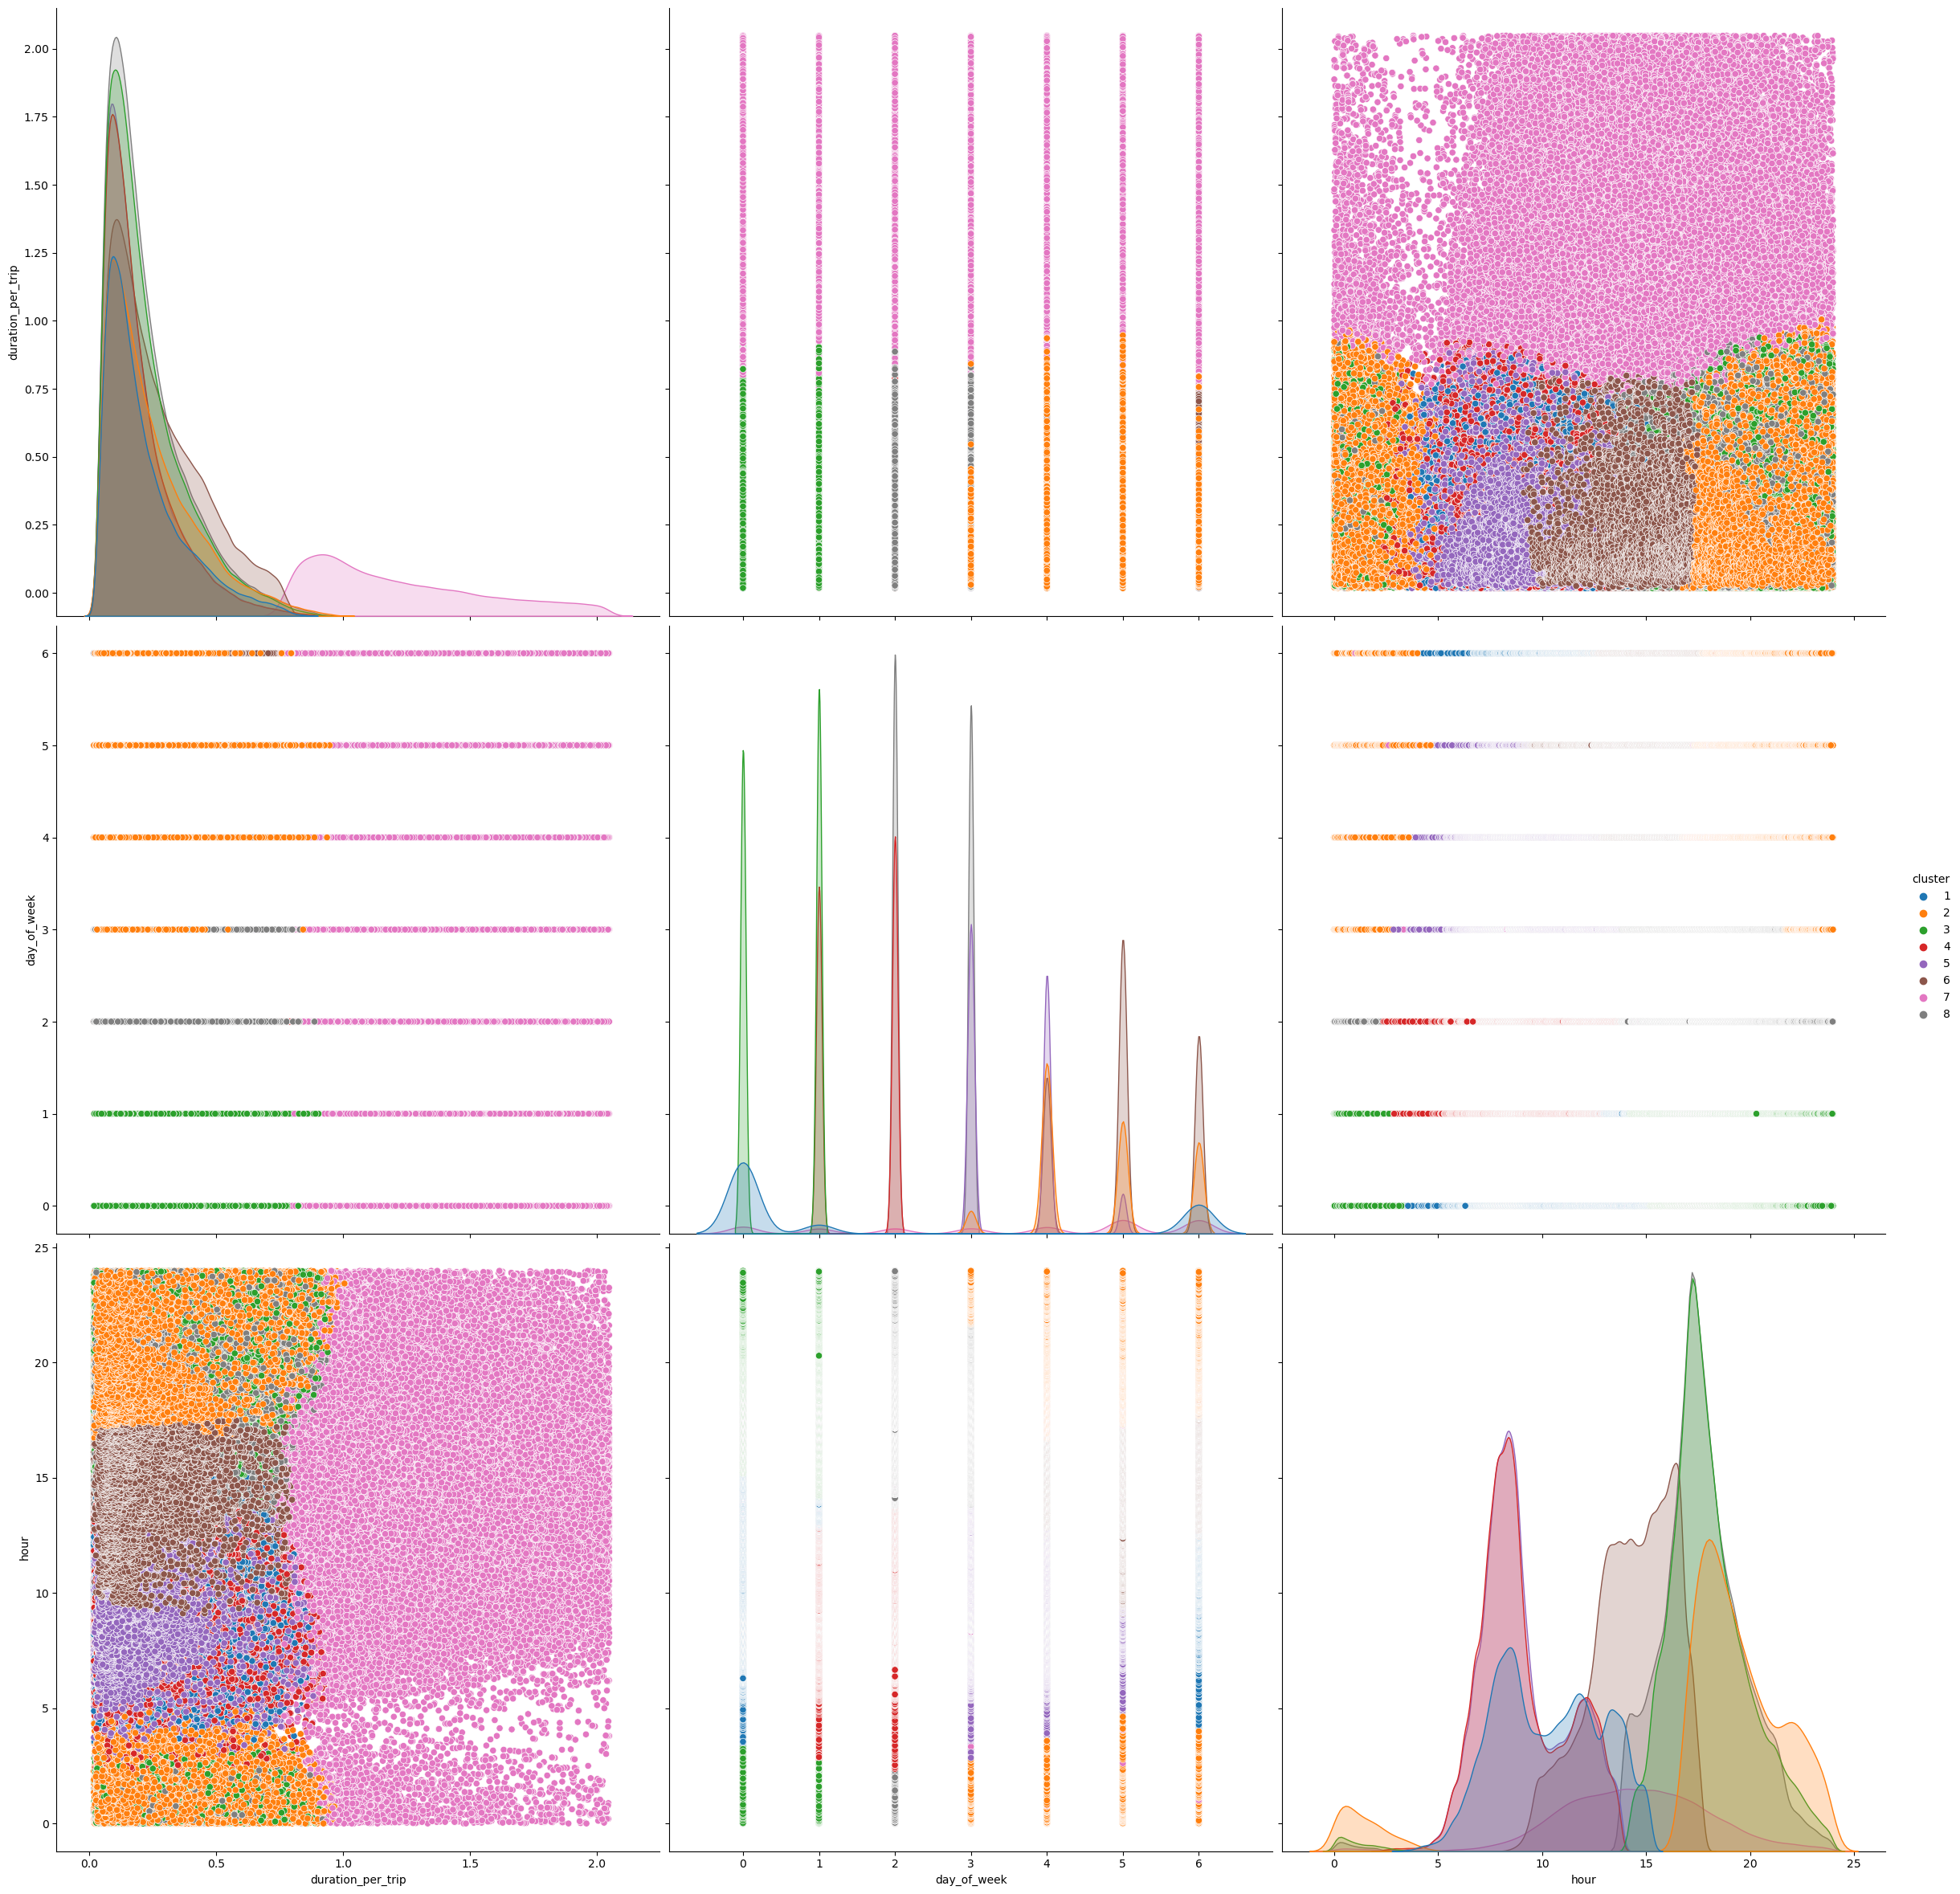

In [166]:
# plot duration, weekday and hour
g = sns.pairplot(data=X_scaled_df, hue="cluster", hue_order=cluster, 
                 height=8, vars=["duration_per_trip","day_of_week","hour"])